# 4. Support Vector Machine

## large margin classification
- logistic regression vs. support vector machine<br/>
<img src="picture/svm1.png">
cost1함수(hyplerplane함수값) 값이 1보다 작으면 1로 분류되고, -1보다 작으면 0으로 분류된다.<br/><br/>
y(i)=1 -> cost1(z) >= 1    
y(i)=0 -> cost0(z) <= -1
<img src="picture/svm2.png">
- large margin classification
classification problem에서 svm은 class간의 가장 margin이 큰 hyperplane을 찾고자 한다.<br/>
여기서 **margin**은 hyperplane과 각 class의 hyperplane과 가장 가까운 element와의 거리를 의미한다.<br/><br/>
<img src ="picture/svm3.png"><br/>
C가 크면 regularization이 적고, 모든 데이터와 outlier까지 모두 고려해서 가장 적합한 hyperplane을 찾고자 한다.<br/>
C가 작으면 outlier는 penalize시킬려는 경향이 강하고, regularization이 많이 된다. <br/>
margin을 최대화하는 지점을 찾기 위해서는 w 값을 minimize시켜야 한다!
<br/><br/>
---
## Decision boundary
* 참고
<img src = "picture/inner_project.png">
<br/><br/>
왜 w(parameter vector)를 minimizing시키는 지점이 margin이 최대화하는 hyperplane인가<br/><br/>
결국 svm에서는 데이터 사이의 margin을 최대화시키면서도 general한 hyperplane을 찾고자 한다. <br/><br/>
일단 C(regularizing factor)는 고려하지 않고, 데이터만을 고려했을 때 hyperplane에 해당하는 vector를 $g$라고 하자<br/>
$ \vec{g} = \sum_i^k\theta_ix_i+\theta_0 $ 이 경우 단순하게 생각하기 위해 $ \theta_0 = 0, k(feature\,number) = 0 $이라 하자<br/><br/>
그렇다면 이 경우에서는 아래와 같은 optimization problem을 해결하고자 한다.<br/><br/>
$$ min_{\theta}\,\frac{1}{2}\sum_{j=1}^n\theta_j^2 = \frac{1}{2}(\theta_1^2+\theta_2^2) = \frac{1}{2}(\sqrt{\theta_1^2+\theta_2^2})^2 =  \frac{1}{2}\left \| \theta \right \|^2 $$ <br/>
<img src="picture/svm4.png" align = "right">
$ s.t.$ <br/>
$ \theta^Tx(i)\geq 1\,,\,if\, y^{(i)}=1, $ <br/><br/>
$ \theta^Tx(i)\leq -1\,,\,if\, y^{(i)}=0 $ <br/><br/><br/>
여기서 $\theta^Tx(i) $는 무엇을 의미할까.<br/><br/>
$= p^{(i)} \cdot \left \| \theta \right \| $ <br/><br/>
$= \theta_1x_1^{(i)}+\theta_2x_2^{(i)} $
<img src="picture/svm5.png"><br/>
초록색을 support vector(hyperplane)이라고 가정하면, <br/>hyperplane vector g의 orthogonal vector $\theta$인($\theta_0$가 0이므로 g의 projection vector는 $\theta$이다.) <br/> 각 class에서 가장 가까운 element를 projection했을 때의 길이를 $p^{(i)}$라 했을 때, 왼쪽 그래프의 경우 hyperplane이 두 class를 적절하게 분리하지 못하고 있기 때문에, $p(i)$가 작은 값이고, 두 class를 분리하기 위해서는 $\left \| \theta \right \| $ 가 큰 값이 되게 된다. <br/>하지만 오른쪽 그래프의 경우 $p(i)$가 큰 값이고, $\left \| \theta \right \| $ 가 작은 값이 된다. 오른쪽 그래프가 더욱더 큰 margin을 가지고 classify 하는 hyperplane이라고 할 수 있다.<br/><br/>
따라서 최소의 parameter vector값을 구하면 margin을 최대화하는 supprot vector를 구할 수 있다.


---
## Soft margin
위의 SVM방식은 **Hard margin**방법이라고 한다.<br/> Hard margin방법은 매우 엄격하게 두 개의 class를 분리하는 hyperplane을 구하는 방법이다. 하지만 이러한 방법은 outlier나 noise로 인해 hyperplane을 잘 구하지 못하는 경우가 발생할 수 있다.<br/><br/>
이러한 문제점을 해결하기 위해서 **soft margin**방법이 개발되었다.<br/>
이 방법은 support vector가 위치한 경계선에 약간의 여유값을 두는 것이다.<br/><br/>
$$ y_i(w_0+w_1x_1+w_2x_2) \geq 1-\xi_i\,, \,\xi_i \geq 0 \,\,\,for\,\,\forall i $$<br/>
이식은 support vector의 경계선에서 $\xi$만큼의 error를 인정한다는 의미이다.<br/>
이에 따라서 margin을 최대화하는 objective function은<br/>
$$ min\frac{1}{2}\left \| w \right \|^w + C\sum\xi_i $$
$$ s.t.\,\,\, y_i(w_0+w_1x_1+w_2x_2) \geq 1-\xi_i\,, \,\xi_i \geq 0 \,\,\,for\,\,\forall i $$<br/>
이와 같다.
<br/>
---
## Kernel
- 만약 class가 linear하게 구분되는 형태가 아닌 non-linear하게 구분되는 경우 다양한 커널함수를 사용할 수 있다.<br/><br/>
<img src="picture/svm-kernel2.png" align="right">
- **kernel** 이란 일종의 similarity function이다. kernel은 두개의 input을 받아서 둘이 얼마나 비슷한지 반환하는 머신러닝 알고리즘이다.<br/><br/>
예를들어, 어떠한 input x가 주어졌을 때, landmark $l^{(1)},l^{(2)},l^{(3)}$에 얼마나 가까운지에 따라서 새로운 feature를 정의할 수 있다.<br/><br/>
$$f_i = similarity(x,l^{(i)})=exp(-\frac{\left \| x-l^{(i)} \right \|^2}{2\sigma^2}) $$ 
<br/>
$ if x \approx l^{(1)}  : $
= x is close to l1<br/>
$$ f_1 \approx exp(-\frac{0^2}{2\sigma^2})\,\approx\,1$$<br/><br/>
if x is far from l1 <br/>
$$ f_1 \approx exp(-\frac{(large\,number)^2}{2\sigma^2})\,\approx\,0$$
<br/><br/>
- Examples<br/>
<img src="picture/kernel_ex1.png" align="left">
Predict y = 1, $$ if\,\,\theta_0+\theta_1 f_1+\theta_2 f_2+\theta_3 f_3\geq0 $$<br/>
$$ \theta_0=-0.5,\,\theta_1=1,\,\theta_2=0,\,\theta_3=0$$<br/>
$$f_1\approx1,f_2\approx0,f_e\approx0$$<br/>
$$\theta_0+\theta_1*1+\theta_2*1+\theta_3*0$$$$=-0.5+1=0.5\geq0$$<br/>
therefore this point predicted as **y = 1**
<br/><br/><br/>
<img src="picture/kernel_ex2.png" align="left">
<br/>
Predict y = 1, $$ if\,\,\theta_0+\theta_1 f_1+\theta_2 f_2+\theta_3 f_3\geq0 $$<br/>
$$ \theta_0=-0.5,\,\theta_1=1,\,\theta_2=0,\,\theta_3=0$$<br/>
$$f_1\approx0,f_2\approx0,f_e\approx0$$<br/>
$$\theta_0+\theta_1*0+\theta_2*1+\theta_3*=-0.5\leq0$$<br/>
therefore this point predicted as **y = 0**
<br/><br/><br/>
So like this, these landmarks can work as hyperplane
<br/><br/>
-그렇다면 landmark를 어떻게 고를 수 있을까.
우선 데이터가 주어졌을 때 각 데이터를 landmark로 삼는다. <br/>
그 다음 만약 $\theta^Tf\geq0$이면 $y=1$로 예측한다.<br/><br/>
f1 function은 다음과 같은 objective function을 통해서 구한다.<br/>
$$ min\,C\sum_{i=1}^my^{(i)}cost_1(\theta^Tf^{(i)})+(1-y^{(i)})cost_0(\theta^Tf^{(i)})+\frac{1}{2}\sum_{j=1}^m\theta_j^2$$
 <br/>

### Kernel 함수의 종류<br/>

### 1) linear kernel
- linear한 형태의 hyper plane을 구하는 것이다.
   - C값만 정해주면 된다 
 
<img src="picture/rbf.png" align ="right">
### 2) Gaussian(RBF) kernel
   - training set을 kernel로 이용한다.
   - $\sigma^2$을 정해줘야 한다.
   - do not perform feature scaling before using RBF kernel<br/>
   - $ f_i = exp(-\frac{\left \| x-l^{(i)} \right \|^2}{2\sigma^2}),\,\,where\,\,\,l^{(i)}=x^{(i)})$
    <br/>
    
### 3) polynomial kernel<br/><br/>
   - $k(x,l)=(x^Tl+constant)^{degree} $

---
## SVM Parameter
### $𝐶(=\frac{1}{\lambda})$
    Large C: Lower bias (prone to overfitting)<br/>
    Small C: Lower variance (prone to underfitting)<br/>

### $\sigma^2$
   Large $ \sigma^2 $ : Lower variance (prone to underfitting)<br/>
    Small $ \sigma^2 $ : Lower bias (prone to overfitting)<br/>


In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from numpy.random import RandomState
from numpy import nonzero

In [3]:
from tools import rmse_cal,mae_cal,cor_cal,mean_cal,frange,\
                    accuracy,precision,recall,aupr,f1_score,make_binary
from validation import classification_cv,regression_cv,external_val_reg,\
                        external_val_classif, test_preprocessing, cal_auc, \
                        draw_roc,cal_external_auc

In [4]:
dataset=pd.read_table('data/breast_cancer_svc.tsv',sep='\t')

In [5]:
input_data=dataset.iloc[:,1:].transpose()
X_data=input_data.iloc[:,:-1].values
y_data=input_data.iloc[:,-1]
y_data=make_binary('normal','cancer',y_data)

In [6]:
svc=SVC(max_iter=10000, random_state=RandomState(None))
# C : penalty parameter
#kernel : 커널 종류
# degree : polynomial kernel의 차수
# gamma : sigma^2 , 커널값들이 얼마나 퍼져있는지 
# coef0 :  polynomial kernel의 경우 다음과 같은 식이다. gamma*u'*v + coef0)^degree

find the best parameter for support vector machine by using grid search algorithm
- C value and best kernel

In [7]:
kf=KFold(n_splits=10,shuffle=True)
parameters={'C':[1,2,5,10,20,50,100], 'kernel':['linear','poly','rbf']}

clf=GridSearchCV(svc,parameters,cv=kf,n_jobs=20)

In [8]:
clf.fit(X_data,y_data)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False,
  random_state=<mtrand.RandomState object at 0x7fc55ab7d370>,
  shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=20,
       param_grid={'kernel': ['linear', 'poly', 'rbf'], 'C': [1, 2, 5, 10, 20, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [9]:
parameters=clf.best_params_

In [10]:
c=parameters['C']
kernel=parameters['kernel']

modified model using best parameter 

In [11]:
fitted_svc=SVC(max_iter=10000, random_state=RandomState(None),C=c,kernel=kernel)

10-fold cross validation

In [12]:
cv_test=classification_cv(10,fitted_svc,dataset)

accuracy : 1.0
precision :1.0
recall : 1.0
f1_score : 1.0


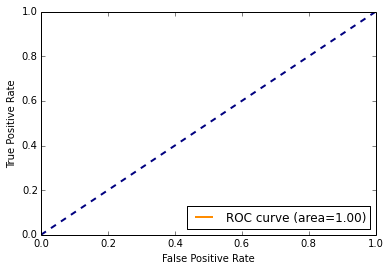

In [13]:
draw_roc(dataset,fitted_svc,.2)

External validation

In [14]:
testset=pd.read_table('data/breast_cancer_test.tsv',sep='\t')

In [15]:
tmp=test_preprocessing(testset,dataset)
X_test=tmp.iloc[1:,:-1].values

In [16]:
test_result=external_val_classif(testset,dataset,fitted_svc)

accuracy : 0.875
precision :0.2
recall : 0.666666666667
f1_score : 0.307692307692


In [17]:
y_score=fitted_svc.decision_function(X_test)

In [18]:
cal_external_auc(testset,y_score)

auc : 0.86935483871
aupr : 0.498885033096


(0.86935483870967745, 0.49888503309555943)

## Support Vector Regression
support vector machine은 regression method로써도 사용할 수 있다.<br/>
Support Vector Regression(SVR)은 classification을 위한 SVM과 기본 원리는 거의 동일하지만 약간의 차이점이 있다.<br/><br/>
SVR에서는 soft margin method처럼 margin of tolerance($\epsilon$),즉 margin을 최대화 하는 지점을 찾지만 거기에 일정부분의 error값을 둔다.<br/>
하지만 error를 최소화 하면서 margin을 최대화시키는  hyperplane을 찾고자 하는 기본 원리는 동일하다. 
<img src = "picture/svr.png">
objective function을 살펴보면, 앞선 parameter vector의 길이를 최소화하려는 부분이 margin을 최대화하는 점을 찾고자 하는 부분에 해당하며, penalizing factor(C)가 붙은 부분이 error를 최소화하려는 부분에 해당한다.<br/>
이때 margin을 구할 때 error값에 해당하는 $\epsilon$ 내부에 존재하는 점들은 고려하지 않고 바깥에 있는 점들의 error들만 최소화하는 점들을 구한다. 이 경우 outlier에 영향을 많이 받을 수 있기 때문에 C값을 조절해서 penalty를 준다. 

In [19]:
from sklearn.svm import SVR

In [37]:
dataset=pd.read_table('data/blood_age_selected_lasso.tsv',sep='\t')

In [38]:
X_data = input_data.iloc[:,:-1]
y_data = input_data.iloc[:,-1]

In [39]:
svr=SVR(gamma='auto',tol=0.001,verbose=False, max_iter=10000)

In [65]:
kf=KFold(n_splits=10,shuffle=True)
parameters={'C':[1,2,5,10,20,50,100], 'kernel':['linear','poly','rbf'],'epsilon':[0.001,0.01,0.05,0.1,0.2,0.3]}

clf=GridSearchCV(svr,parameters,cv=kf,n_jobs=20)

In [66]:
clf.fit(X_data,y_data)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
       error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=10000, shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=20,
       param_grid={'kernel': ['linear', 'poly', 'rbf'], 'C': [1, 2, 5, 10, 20, 50, 100], 'epsilon': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [67]:
parameters=clf.best_params_

In [68]:
c=parameters['C']
ep=parameters['epsilon']
kernel=parameters['kernel']

In [69]:
ep

0.1

In [70]:
fitted_svr=SVR(max_iter=10000, C=c,kernel=kernel,epsilon=ep)

In [71]:
cv_result=regression_cv(10,svr,dataset)

rmse : 13.7527773346
mad : 10.9661855408
cor : 0.662401755641


In [72]:
test_df=pd.read_table('data/blood_age_test.tsv',sep='\t')

In [73]:
test_result=external_val_reg(test_df,dataset,svr)

rmse = 36.7973759384
mae = 35.3897455856
cor = 0.164137963888
